# Utilisation de l'API, statistiques

In [1]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
API_URL = "http://localhost:8000/"

## GET /movies/

In [3]:
skip = 0
limit = 2000
dfMovies = pd.read_json(API_URL+f"movies/?limit={limit}&skip={skip}")
dfMovies.set_index("id", inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,51.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
12771928,youpii,2020,NaN
12771929,youpii,2020,NaN
333333333,youpii,2020,NaN


## GET /stars/

In [4]:
skip = 0
limit = 50000
dfStars = pd.read_json(API_URL+f"stars?limit={limit}&skip={skip}", convert_dates=['birthdate'])
dfStars.set_index("id", inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
11749101,Heinz Hoffman,NaT
11749102,zzzzzza,1970-01-01
11749103,youpi actor,1970-01-01


## GET /movies/stats_count_by_year

In [5]:
dfMoviesByYear = pd.read_json(API_URL+f"movies/stats_count_by_year")
dfMoviesByYear = dfMoviesByYear[['year', 'movie_count']]
dfMoviesByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
101,2016,15
102,2017,22
103,2018,20
104,2019,28


## GET /stars/stats_movie_by_director

In [6]:
dfDirectors = pd.read_json(API_URL+"stars/stats_movie_by_director")
dfDirectors

,director,movie_count
0,"{'name': 'Alfred Hitchcock', 'birthdate': '189...",60
1,"{'name': 'Martin Scorsese', 'birthdate': '1942...",48
2,"{'name': 'Steven Spielberg', 'birthdate': '194...",41
3,"{'name': 'Clint Eastwood', 'birthdate': '1930-...",39
4,"{'name': 'Brian De Palma', 'birthdate': '1940-...",38
5,"{'name': 'Ridley Scott', 'birthdate': '1937-11...",35
6,"{'name': 'John Woo', 'birthdate': '1946-09-22'...",34
7,"{'name': 'Steve McQueen', 'birthdate': '1969-1...",31
8,"{'name': 'Sam Raimi', 'birthdate': '1959-10-23...",31
9,"{'name': 'John Ford', 'birthdate': None, 'id':...",20


On va aplatir le 'director' pour répartir ses attributs dans différentes colonnes

In [7]:
response = requests.get(API_URL+"stars/stats_movie_by_director?minc=0")
if response.status_code != 200:
    print(f"Request failed, status {response.status_code}")
else:
    print("Response OK")
    data_json = response.json()
response_flatten = [ { **d['director'], "movie_count": d['movie_count']} for d in data_json]
dfStatsMoviesByDirector = pd.DataFrame(response_flatten)
dfStatsMoviesByDirector['birthdate'] = pd.to_datetime(dfStatsMoviesByDirector['birthdate']).dt.strftime("%d/%m/%Y")
dfStatsMoviesByDirector

Response OK


,name,birthdate,id,movie_count
0,Alfred Hitchcock,13/08/1899,33,60
1,Martin Scorsese,17/11/1942,217,48
2,Steven Spielberg,18/12/1946,229,41
3,Clint Eastwood,31/05/1930,142,39
4,Brian De Palma,11/09/1940,361,38
...,...,...,...,...
609,Charles Paek,NaN,5170520,1
610,Morton M. Lewis,NaN,5638280,1
611,Clara Balzary,NaN,8477405,1
612,Pascal Baillien,NaN,9497376,1


## GET /stars/by_birthyear/{year}

In [8]:
year = 1930
dfStarsByBirthyear = pd.read_json(API_URL+f"stars/by_birthyear/{year}", convert_dates=['birthdate']).set_index('name')
dfStarsByBirthyear

,birthdate,id
name,,
Abel Fernandez,1930-01-01,273359
Alejandro Rey,1930-01-01,721031
Alfie Curtis,1930-01-01,193238
Alvin Greenman,1930-01-01,339141
Angela Paton,1930-01-01,665708
...,...,...
Warren Vanders,1930-01-01,888845
Will Hutchins,1930-01-01,404298
William Joyce,1930-01-01,431499


## GET /movies/by_title_part

In [9]:
title_part = "dark"
dfMoviesByTitlePart = pd.read_json(API_URL+f"movies/by_title_part/?t={title_part}").set_index('title')
dfMoviesByTitlePart

,year,duration,id
title,,,
A Tale of Love and Darkness,2015,95,1135989
Army of Darkness,1992,81,106308
Bruce Springsteen: Dancing in the Dark,1984,4,4664524
Dark Command,1940,94,32383
Darkman,1990,96,99365
Terminator: Dark Fate,2019,128,6450804
The Chronicles of Riddick: Dark Fury,2004,35,407658
The Dark Knight,2008,152,468569
The Dark Knight Rises,2012,164,1345836


## GET /stars/stats_actors

In [10]:
min_count = 30
response = requests.get(API_URL+f"stars/stats_actors?minc={min_count}")
if response.status_code != 200:
    print(f"Request failed, status {response.status_code}")
else:
    print("Response OK")
    data_json = response.json()
response_flatten = [ { **d['actor'],
                      "movie_count": d['movie_count'],
                      "first_movie_year": d['first_movie_year'], 
                      "last_movie_year": d['last_movie_year']} for d in data_json]
dfActors = pd.DataFrame(response_flatten)
dfActors['birthdate'] = pd.to_datetime(dfActors['birthdate']).dt.strftime("%d/%m/%Y")
dfActors

Response OK


,name,birthdate,id,movie_count,first_movie_year,last_movie_year
0,John Wayne,26/05/1907,78,172,1926,1976
1,Harrison Ford,22/03/1884,1230,86,1915,1932
2,Sylvester Stallone,06/07/1946,230,73,1969,2019
3,Sean Connery,25/08/1930,125,73,1954,2012
4,Tom Hanks,09/07/1956,158,69,1980,2020
5,Jean-Claude Van Damme,18/10/1960,241,66,1979,2019
6,Clint Eastwood,31/05/1930,142,63,1955,2018
7,Harrison Ford,13/07/1942,148,63,1966,2020
8,Arnold Schwarzenegger,30/07/1947,216,56,1970,2019
9,Will Smith,25/09/1968,226,50,1988,2020


## Graphe : Nombre de films par directeur

In [11]:
dfStatsCountMoviesByDirector = dfStatsMoviesByDirector.loc[dfStatsMoviesByDirector.movie_count > 30][['name', 'movie_count']] \
.set_index('name')

In [12]:
type(dfStatsCountMoviesByDirector)

pandas.core.frame.DataFrame

In [13]:
movie_count_ndarray = dfStatsCountMoviesByDirector.movie_count.values

Text(0.5, 1.0, 'Diagramme bar')

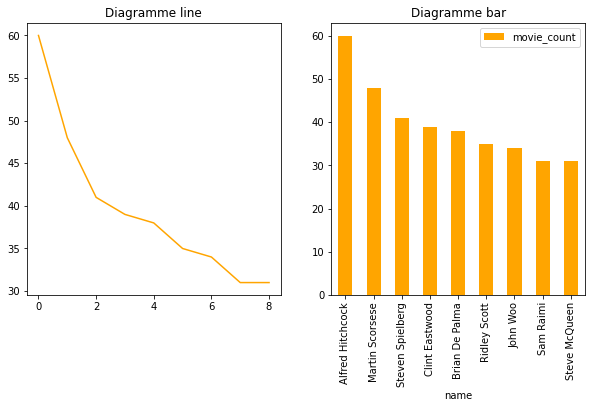

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(movie_count_ndarray, color='orange')
dfStatsCountMoviesByDirector.plot(kind='bar', ax=ax2, color='orange')

ax1.set_title("Diagramme line")
ax2.set_title("Diagramme bar")

## Graphe : Nombre de stars/movies par année

In [15]:
dfCountStarsByYear = dfStars[~dfStars.birthdate.isna()].groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfCountMoviesByYear = dfMovies.groupby(pd.Grouper(key='year')).count()[['title']]
dfCountStarsByYearFromApi = pd.read_json(API_URL+"stars/stats_by_birthyear").set_index("birthyear")

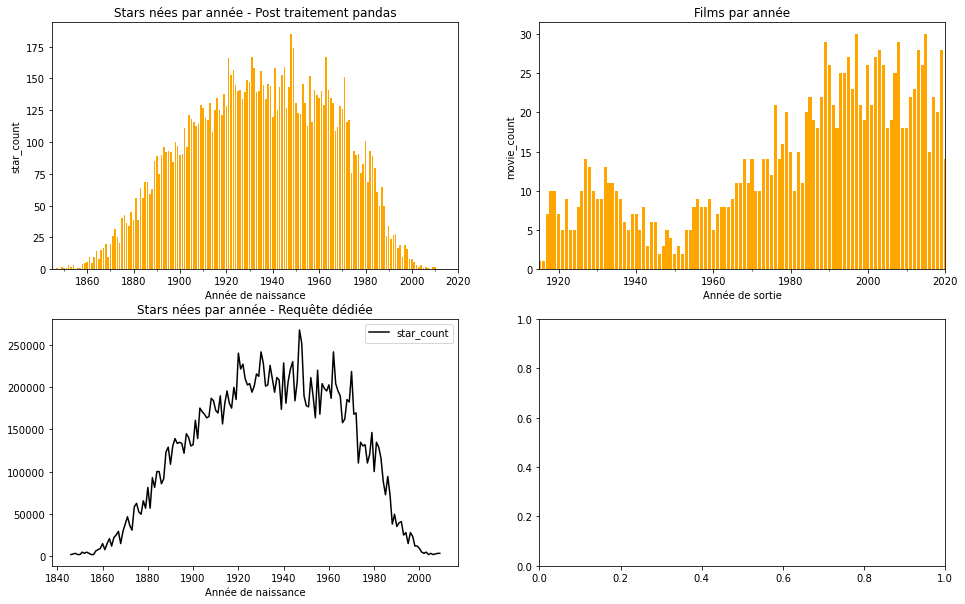

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10))

ax1.bar(dfCountStarsByYear.index, dfCountStarsByYear.name, color='orange', width=250)
ax1.set_title("Stars nées par année - Post traitement pandas")
ax1.set_xlabel("Année de naissance")
ax1.set_ylabel("star_count")
ax1.set_xlim(datetime(1845,1,1), datetime(2020,1,1))
ax1.xaxis.set_minor_locator(mdates.YearLocator(base=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2.bar(dfCountMoviesByYear.index, dfCountMoviesByYear.title, color='orange')
ax2.set_title("Films par année")
ax2.set_xlabel("Année de sortie")
ax2.set_ylabel("movie_count")
ax2.set_xlim(1915, 2020)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))

dfCountStarsByYearFromApi.plot(ax=ax3, color="black")
ax3.set_title("Stars nées par année - Requête dédiée")
ax3.set_xlabel("Année de naissance")
ax1.set_xlim(datetime(1845,1,1), datetime(2020,1,1))
ax1.xaxis.set_minor_locator(mdates.YearLocator(base=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

## Top 10 acteurs

In [17]:
dfTop10Actors = dfActors[:10] if dfActors.size >= 10 else dfActors
dfTop10Actors

,name,birthdate,id,movie_count,first_movie_year,last_movie_year
0,John Wayne,26/05/1907,78,172,1926,1976
1,Harrison Ford,22/03/1884,1230,86,1915,1932
2,Sylvester Stallone,06/07/1946,230,73,1969,2019
3,Sean Connery,25/08/1930,125,73,1954,2012
4,Tom Hanks,09/07/1956,158,69,1980,2020
5,Jean-Claude Van Damme,18/10/1960,241,66,1979,2019
6,Clint Eastwood,31/05/1930,142,63,1955,2018
7,Harrison Ford,13/07/1942,148,63,1966,2020
8,Arnold Schwarzenegger,30/07/1947,216,56,1970,2019
9,Will Smith,25/09/1968,226,50,1988,2020


In [18]:
dfTop10ActorsMovieCount = dfTop10Actors[['name', 'movie_count']].set_index('name')
dfTop10ActorsYears = dfTop10Actors[['name', 'first_movie_year', 'last_movie_year']].set_index('name')

(1900.0, 2025.0)

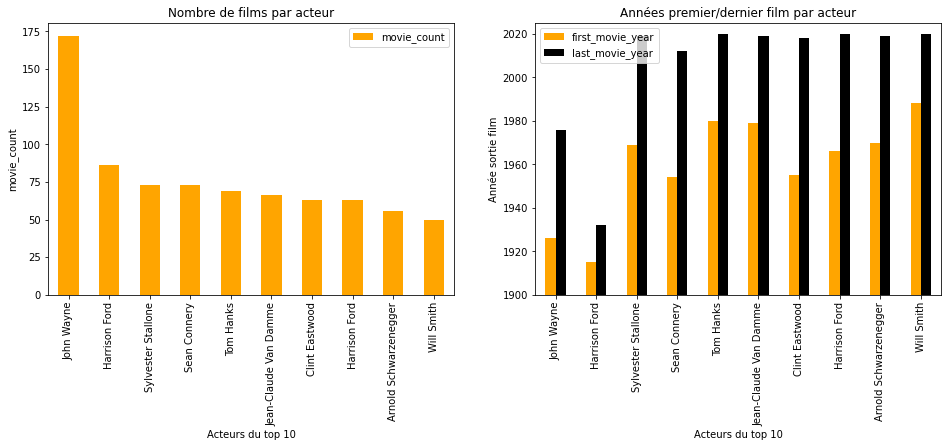

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

dfTop10ActorsMovieCount.plot(kind="bar", ax=ax1, color='orange')
# ax1.bar(dfTop10Actors.index, dfTop10Actors.movie_count, color='orange', width=250)
ax1.set_title("Nombre de films par acteur")
ax1.set_ylabel("movie_count")
ax1.set_xlabel("Acteurs du top 10")

dfTop10ActorsYears.plot(kind="bar", ax=ax2, color=['orange', 'black'])
ax2.set_title("Années premier/dernier film par acteur")
ax2.set_ylabel("Année sortie film")
ax2.set_xlabel("Acteurs du top 10")
ax2.set_ylim(1900, 2025)
# ax2.set_xlim(1915, 2020)
# ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))